# The NHL's Lucky Charm

I've been wanting to explore which player is a "lucky charm" for their team. Not necessarily which player is getting lucky, but which player is causing his **team** to get lucky. Just how great players make their teammates better by setting them up beautifully, or scoring goals off any pass, lucky charm players make their teammates better by just being on the same team as them! "Puck luck" and "lucky bounces" are always talked about in hockey and it's an intangible part of the game, but let's try to quantify it anyway!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Exploring The Data

The data that I used for this is from [MoneyPuck](https://moneypuck.com/) which is an incredible resource for any hockey stats nerd. This used the 2024-25 season's data, but it should run with any season that you'd like to check.

In [2]:
season = "2024-25"

file_prefix = f"../data/{season}/"

skaters_file = file_prefix + "skaters.csv"

The data shows different statistics for different situations. This is a very important distinction to make in hockey, as the game is played completely differently in man-up vs even strength situations.

In [3]:
data = pd.read_csv(skaters_file)

data.head()

,playerId,season,name,team,position,situation,games_played,icetime,shifts,gameScore,...,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
0,8478047,2024,Michael Bunting,NSH,L,other,76,2237.0,37.0,26.19,...,7.28,10.09,72.0,87.0,0.00,0.00,0.0,0.0,0.0,0.0
1,8478047,2024,Michael Bunting,NSH,L,all,76,70819.0,1474.0,43.70,...,161.54,187.75,3221.0,3522.0,0.00,0.00,0.0,0.0,0.0,0.0
2,8478047,2024,Michael Bunting,NSH,L,5on5,76,59813.0,1294.0,43.70,...,112.73,122.08,2661.0,2707.0,0.71,1.71,19.0,43.0,16.0,31.0
3,8478047,2024,Michael Bunting,NSH,L,4on5,76,6.0,2.0,2.58,...,0.20,0.17,4.0,11.0,0.00,0.00,0.0,0.0,0.0,0.0
4,8478047,2024,Michael Bunting,NSH,L,5on4,76,8763.0,141.0,36.88,...,23.81,2.60,311.0,54.0,0.00,0.01,0.0,1.0,0.0,1.0


Overall there were 920 unique players in the NHL in the 2024-25 season. However, we want to make sure to find someone who was consistently lucky, rather than someone who got lucky being lucky. There's nothing more lucky than lucky number 7, so to make sure we have a good sample size, we're going to only look at players who have played at least 77 games.

In [4]:
unique_players = len(data['playerId'].unique())

print(f"Number of players in the {season} NHL Season: {unique_players}")

Number of players in the 2024-25 NHL Season: 920


In [5]:
# get all players who have played at least 70 games
players_77 = data[data["games_played"] >= 77].copy()

unique_players_77 = len(players_77['playerId'].unique())

print(f"Number of players in the {season} NHL Season with at least 77 games played: {unique_players_77}")

Number of players in the 2024-25 NHL Season with at least 77 games played: 280


## Current Puck Luck Stats

Right now, there's already an advanced metric that we can use to sort of define "puck luck", and that's PDO (Personal Discouragement Outcomes). All PDO is, is the sum of a team's shooting percentage plus a team's save percentage. This averages out to 100.

With a big sample size, PDO can help see if a team is playing above or below expectations, and can help aid in understanding how a team might regress back to the mean. In small sample sizes, it can help show who is really hot or really cold. It is important to note that since PDO is measuring luck, and is very influenced by luck, it is not a good stat in isolation. It is extremely valuable in conjunction with other stats and showing a quick overview, but is not meant to be a sole stat used to inform a team's or player's performance.

So let's use it for exactly that! I want to find the On Ice PDO of each player, rather than the team PDO or player's individual PDO. This will help us see who's teammates are getting lucky during their shifts as well, while ignoring the team's performance while on the player is on the bench. 

In [ ]:
# calculate pdo based on shots and goals
shots_for = players_77["OnIce_F_shotsOnGoal"]
shots_against = players_77["OnIce_A_shotsOnGoal"]

players_77["OnIce_F_ShotPercentage"] = np.where(shots_for > 0,
                                    players_77["OnIce_F_goals"] / shots_for,
                                    np.nan)

players_77["OnIce_F_SavePercentage"] = np.where(shots_against > 0,
                                    1 - (players_77["OnIce_A_goals"] / shots_against),
                                    np.nan)

# PDO on 1.000 scale (typical analytics usage)
players_77["OnIce_PDO"] = players_77["OnIce_F_ShotPercentage"] + players_77["OnIce_F_SavePercentage"]

# PDO on ~100 scale (common media display)
players_77["OnIce_PDO_100"] = 100 * players_77["OnIce_PDO"]

pdo = players_77[["playerId", "name", "team", "position", "situation", "OnIce_F_ShotPercentage", "OnIce_F_SavePercentage", "OnIce_PDO", "OnIce_PDO_100"]]

In [7]:
pdo.head()

,playerId,name,team,position,situation,OnIce_F_ShotPercentage,OnIce_F_SavePercentage,OnIce_PDO,OnIce_PDO_100
5,8480950,Ilya Lyubushkin,DAL,D,other,1.000000,0.800000,1.800000,180.000000
6,8480950,Ilya Lyubushkin,DAL,D,all,0.100000,0.902760,1.002760,100.275953
7,8480950,Ilya Lyubushkin,DAL,D,5on5,0.093306,0.920354,1.013660,101.366027
8,8480950,Ilya Lyubushkin,DAL,D,4on5,0.093750,0.866667,0.960417,96.041667
9,8480950,Ilya Lyubushkin,DAL,D,5on4,0.000000,NaN,NaN,NaN


If we look at the On Ice PDO in all situations, we see why it's important that we're going to make a distinction at only looking at 5 on 5 stats. In the 2024-25 season, the top 3 players are all on the Winnipeg Jets. That season, the Jets had the best power play in the entire NHL, and their goalie won both the Vezina and Hart trophies, and had the second highest save percentage (0.925) in the entire league. Only Anthony Stolarz had a higher save percentage with 0.926, but had 29 less games played (63 vs 34).

In [8]:
pdo_all = pdo[pdo["situation"] == "all"]

pdo_all.sort_values(by="OnIce_PDO_100", ascending=False).head(5)

,playerId,name,team,position,situation,OnIce_F_ShotPercentage,OnIce_F_SavePercentage,OnIce_PDO,OnIce_PDO_100
2466,8478398,Kyle Connor,WPG,L,all,0.147651,0.904762,1.052413,105.241291
956,8476460,Mark Scheifele,WPG,C,all,0.145717,0.905055,1.050773,105.077295
1726,8475799,Nino Niederreiter,WPG,R,all,0.112769,0.936508,1.049277,104.927742
2366,8474151,Ryan McDonagh,TBL,D,all,0.138889,0.909624,1.048513,104.851330
2391,8478010,Brayden Point,TBL,C,all,0.149286,0.898860,1.048147,104.814690


Elite special teams and goaltending is not lucky. If we change this to look at 5 on 5 only, we'll get a much clearer picture on each player's puck luck. We have more reasonable results like Kirill Marchenko who had an amazing breakout year, but a very high save percentage while he's on the ice. This is no fault of his, in fact he's directly influencing it by being great on the defensive end of the puck too! His goalie, Elvis Merzļikins, only had a 0.892 save percentage, which was the 41st ranked SV% and a far cry from the 0.931 with Kirill Marchenko on the ice.

Again, we run into similar issues as before, but at least our results are more reasonable. Adrian Kempe was great year, and Darcy Kuemper was phenomenal which isn't lucky. Then we see Brayden Point's entire line in the top 5, which makes sense since they're backed by another Vezina winner, and have the 2024-25 Ted Lindsay winner on the wing, who's known for his creative playmaking.

This shows the faults of isolating PDO. Especially since we know these players aren't getting lucky, as they've been putting up good performances their entire careers. The 2024-25 season wasn't even Adrian Kempe's best year. Also, we don't want to know which player is getting lucky, but who is making their **team** lucky. This On Ice PDO is going to help us understand at a glance who is getting slightly lucky, but we're going to have to dive a little bit deeper.

In [9]:
pdo_5v5 = pdo[pdo["situation"] == "5on5"]

pdo_5v5.sort_values(by="OnIce_PDO_100", ascending=False).head(10)

,playerId,name,team,position,situation,OnIce_F_ShotPercentage,OnIce_F_SavePercentage,OnIce_PDO,OnIce_PDO_100
1332,8477960,Adrian Kempe,LAK,R,5on5,0.117761,0.932790,1.050551,105.055084
2392,8478010,Brayden Point,TBL,C,5on5,0.124567,0.925566,1.050134,105.013382
767,8477404,Jake Guentzel,TBL,C,5on5,0.116694,0.931148,1.047841,104.784122
4537,8480893,Kirill Marchenko,CBJ,R,5on5,0.116641,0.930530,1.047171,104.717091
872,8476453,Nikita Kucherov,TBL,R,5on5,0.122754,0.922835,1.045589,104.558914
2012,8476902,Esa Lindell,DAL,D,5on5,0.108911,0.935438,1.044348,104.434848
1837,8479385,Jordan Kyrou,STL,R,5on5,0.114338,0.929577,1.043915,104.391503
4152,8478874,Adam Gaudette,OTT,R,5on5,0.101587,0.941358,1.042945,104.294533
2467,8478398,Kyle Connor,WPG,L,5on5,0.111675,0.930876,1.042551,104.255070
2367,8474151,Ryan McDonagh,TBL,D,5on5,0.111667,0.930769,1.042436,104.243590


## What's Luck?

To create a stat that is going to quantify luck, first we are going to have to define what it means to be lucky. We are going to incorporate 5 stats:

These metrics will be:
1. On Ice PDO (defined above)
2. Individual Point Percentage
3. G - xG Difference
4. Linemate G - Linemate xG Difference
5. Low Danger Goals - Low Danger xG

Then we will build a composite z-score metric that will define luck. Using a composite z-score will allow us to combine these different stats on the same scale, and give us a clear picture of not only who is the luckiest charm, but how much more luck they bring than other players.

### IPP (Individual Point Percentage)

IPP will help us see whose teammates are scoring goals without them needing to do anything. This doesn't mean they're freeloaders. They could be drawing defenders to them, screening the goalie, or otherwise letting their linemates get lucky and get to high danger areas more easily than they would've otherwise. This could even be something as lucky as a defender tripping over the blue line, and allowing a free lane for a player to have a free 1 on 1 with the opposing goalie.

In [10]:
# Calculate IPP (Individual Points Percentage)
# IPP = (Player's points on on-ice goals) / (Team goals while player is on ice)

on_ice_goals_for = players_77["OnIce_F_goals"]

players_77["IPP"] = np.where(on_ice_goals_for > 0,
                              players_77["I_F_points"] / on_ice_goals_for,
                              np.nan)

# IPP as percentage (0-100 scale)
players_77["IPP_percentage"] = 100 * players_77["IPP"]

# View IPP by situation
ipp_view = players_77[["playerId", "name", "team", "position", "situation", "I_F_points", "OnIce_F_goals", "IPP", "IPP_percentage"]]


There's just one problem... Defenders are naturally going to have a significantly lower IPP as compared to forwards, since they don't have the puck on their sticks as often in the offensive zone.

In [11]:
ipp_5v5 = ipp_view[ipp_view["situation"] == "5on5"]

ipp_5v5.sort_values(by="IPP_percentage", ascending=True).head(10)

,playerId,name,team,position,situation,I_F_points,OnIce_F_goals,IPP,IPP_percentage
3522,8476885,Jacob Trouba,ANA,D,5on5,10.0,52.0,0.192308,19.230769
3562,8481122,Simon Benoit,TOR,D,5on5,9.0,44.0,0.204545,20.454545
1917,8470600,Ryan Suter,STL,D,5on5,13.0,58.0,0.224138,22.413793
1187,8475188,Brayden McNabb,VGK,D,5on5,16.0,68.0,0.235294,23.529412
942,8475279,Ben Chiarot,DET,D,5on5,12.0,51.0,0.235294,23.529412
2507,8478443,Brandon Carlo,TOR,D,5on5,11.0,46.0,0.239130,23.913043
3672,8477948,Travis Sanheim,PHI,D,5on5,17.0,69.0,0.246377,24.637681
3437,8475455,Brenden Dillon,NJD,D,5on5,14.0,56.0,0.250000,25.000000
2982,8476331,Dylan DeMelo,WPG,D,5on5,18.0,70.0,0.257143,25.714286
562,8481568,Alex Vlasic,CHI,D,5on5,16.0,61.0,0.262295,26.229508


Also, we'd expect IPP to be normally distributed, but there are clearly two humps in the histogram when we play the frequency of IPP.

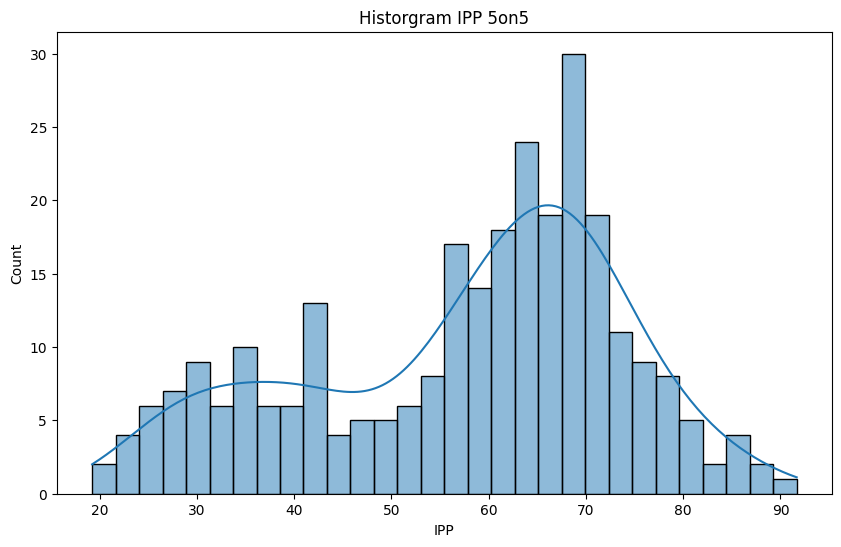

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(ipp_5v5["IPP_percentage"], bins=30, kde=True)
plt.title("Historgram IPP 5on5")
plt.xlabel("IPP")
plt.show()


Not to worry though! Two humps most likely means that one of the distributions is for forwards, and the other for defense. If we look at the stats seperately for the positions, we see this to be true.

In [13]:
ipp_d = ipp_5v5[ipp_5v5["position"] == "D"]

ipp_d.describe()

,playerId,I_F_points,OnIce_F_goals,IPP,IPP_percentage
count,7.400000e+01,74.000000,74.000000,74.000000,74.000000
mean,8.478267e+06,20.500000,57.864865,0.350878,35.087824
std,2.814328e+03,7.360111,11.622279,0.082019,8.201860
min,8.470600e+06,9.000000,29.000000,0.192308,19.230769
25%,8.476564e+06,15.250000,49.500000,0.289263,28.926282
50%,8.478020e+06,18.500000,57.500000,0.347319,34.731935
75%,8.480801e+06,24.000000,66.000000,0.411096,41.109626
max,8.483457e+06,48.000000,86.000000,0.575342,57.534247


In [14]:
ipp_f = ipp_5v5[ipp_5v5["position"] != "D"]

ipp_f.describe()

,playerId,I_F_points,OnIce_F_goals,IPP,IPP_percentage
count,2.060000e+02,206.000000,206.000000,206.000000,206.000000
mean,8.478728e+06,29.742718,44.660194,0.656910,65.690969
std,2.670904e+03,10.865332,13.580871,0.094020,9.401985
min,8.470621e+06,5.000000,12.000000,0.400000,40.000000
25%,8.476834e+06,22.250000,36.000000,0.600000,60.000000
50%,8.478460e+06,29.000000,44.000000,0.659545,65.954545
75%,8.480823e+06,36.000000,53.750000,0.713134,71.313364
max,8.484958e+06,66.000000,82.000000,0.916667,91.666667


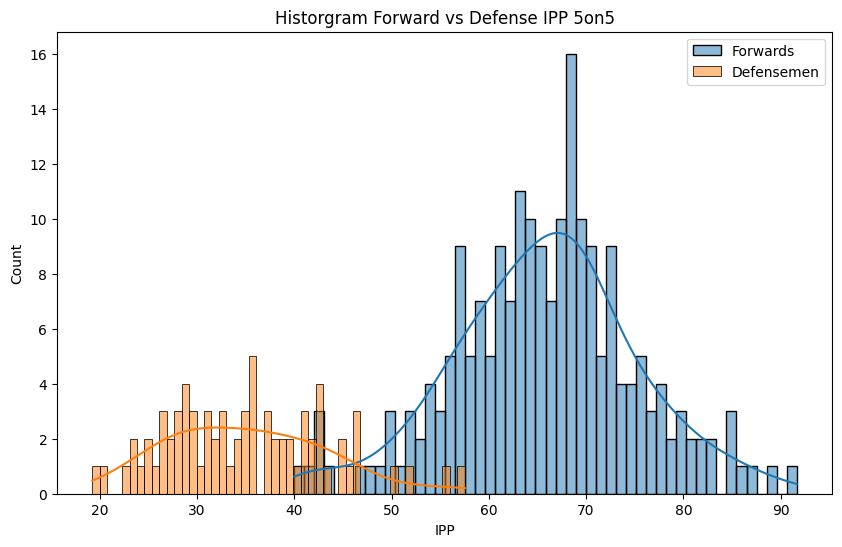

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(ipp_f["IPP_percentage"], bins=50, kde=True, label="Forwards")
sns.histplot(ipp_d["IPP_percentage"], bins=50, kde=True, label="Defensemen")
plt.title("Historgram Forward vs Defense IPP 5on5")
plt.xlabel("IPP")
plt.legend()
plt.show()



We can normalize the IPP by position, rather than as a whole. This way we get a mcuh clearer picture of who has the lowest IPP, since it's going to be relative to the player's position. When we do that, we can see that Jacob Trouba went from 1st place, to 9th in the lowest IPP.

In [16]:
# Filter to 5v5 only for clean analysis
luck_df = players_77[players_77['situation'] == '5on5'].copy()

# IPP Z-Score
# Calculate position-specific IPP means 
position_ipp_means = luck_df.groupby('position')['IPP'].transform('mean')
position_ipp_stds = luck_df.groupby('position')['IPP'].transform('std')

luck_df['ipp_deviation'] = (luck_df['IPP'] - position_ipp_means) / position_ipp_stds

# Z-score normalize the deviation (so it's on same scale as other components)
mean_ipp_dev = luck_df['ipp_deviation'].mean()
std_ipp_dev = luck_df['ipp_deviation'].std()
luck_df['component_ipp'] = (luck_df['ipp_deviation'] - mean_ipp_dev) / std_ipp_dev

print(f"\nTop 10 smallest IPP (relative to position):")
luck_df.nsmallest(10, 'component_ipp')[['name', 'position', 'team', 'IPP_percentage', 'I_F_points', 'OnIce_F_goals', 'component_ipp']]



Top 10 smallest IPP (relative to position):


,name,position,team,IPP_percentage,I_F_points,OnIce_F_goals,component_ipp
1272,John Beecher,C,BOS,40.000000,8.0,20.0,-2.403228
3582,Luke Glendening,C,TBL,41.666667,5.0,12.0,-2.231466
2617,Isac Lundestrom,C,ANA,42.105263,8.0,19.0,-2.186266
3032,Alex Iafallo,L,WPG,50.000000,18.0,36.0,-2.144604
77,Barclay Goodrow,C,SJS,42.857143,6.0,14.0,-2.108779
597,Zemgus Girgensons,C,TBL,42.857143,6.0,14.0,-2.108779
2347,Martin Pospisil,C,CGY,43.181818,19.0,44.0,-2.075319
1727,Nino Niederreiter,R,WPG,51.162791,22.0,43.0,-1.988713
3522,Jacob Trouba,D,ANA,19.230769,10.0,52.0,-1.943827
2752,Lawson Crouse,L,UTA,51.612903,16.0,31.0,-1.942781


We already calculated the On Ice PDO earlier, so let's get the z-score for it as well, and confirm it's a normal distribution.

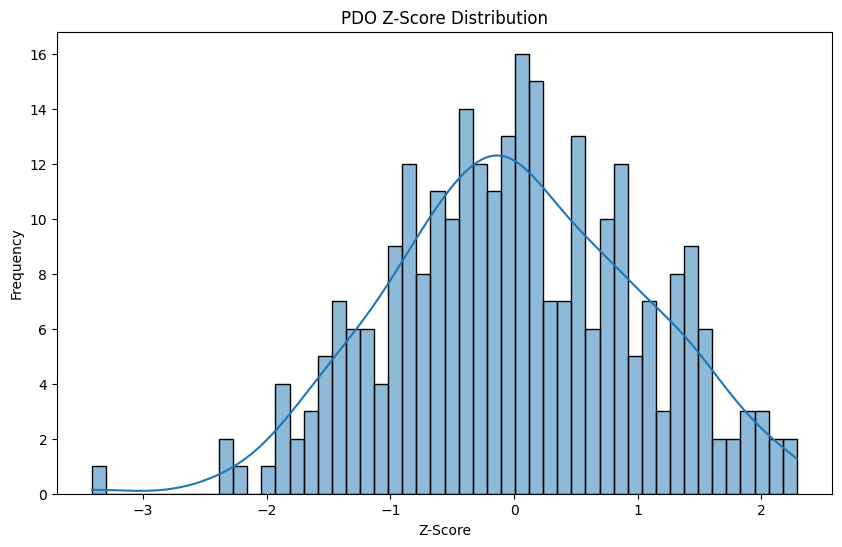

In [17]:
# PDO Z-Score 
# Calculate z-score normalization for OnIce_PDO_100 by situation
mean_pdo = luck_df.groupby('situation')['OnIce_PDO_100'].transform('mean')
std_pdo = luck_df.groupby('situation')['OnIce_PDO_100'].transform('std')
luck_df['OnIce_PDO_100_normalized'] = (luck_df['OnIce_PDO_100'] - mean_pdo) / std_pdo

# Use the normalized PDO for component calculation
luck_df['component_pdo'] = luck_df['OnIce_PDO_100_normalized']

plt.figure(figsize=(10, 6))
sns.histplot(luck_df['component_pdo'], bins=50, kde=True)
plt.title('PDO Z-Score Distribution')
plt.xlabel('Z-Score')
plt.ylabel('Frequency')
plt.show()

Another luck based metric we can use the difference in goals minus expected goals. This gives us  an understanding of who is scoring at a higher rate than other players from the same location. We want to make sure we get the rate metric of this though, so we will get this difference per 60 minutes. Like I mentioned earlier, we want players who are consistently lucky, rather than lucky just once.

In [18]:
# Convert ice time to hours for per-60 calculations
luck_df['icetime_hours'] = luck_df['icetime'] / 3600

In [19]:
# Individual Goals vs xGoals per 60 minutes
luck_df['goals_minus_xgoals'] = luck_df['I_F_goals'] - luck_df['I_F_xGoals']
luck_df['goals_minus_xgoals_per60'] = (luck_df['goals_minus_xgoals'] / luck_df['icetime_hours']) * (60/60)

# Z-score normalize
mean_g_xg = luck_df['goals_minus_xgoals_per60'].mean()
std_g_xg = luck_df['goals_minus_xgoals_per60'].std()
luck_df['component_goals_xgoals'] = (luck_df['goals_minus_xgoals_per60'] - mean_g_xg) / std_g_xg

print(f"\nTop 5 luckiest finishers (goals above expected per 60):")
luck_df.nlargest(5, 'goals_minus_xgoals_per60')[['name', 'I_F_goals', 'I_F_xGoals', 'goals_minus_xgoals_per60']]



Top 5 luckiest finishers (goals above expected per 60):


,name,I_F_goals,I_F_xGoals,goals_minus_xgoals_per60
667,Adam Fantilli,25.0,11.23,0.673002
4152,Adam Gaudette,16.0,8.34,0.639607
1317,Artemi Panarin,25.0,12.75,0.588024
4537,Kirill Marchenko,24.0,12.78,0.558549
4177,Ryan Donato,23.0,13.07,0.539927


More importantly, we want to know who is getting their teammates lucky! We can use the same metric, but define it by the goals their teammates scored and their expected goals, without the current player's goals and expected goals. This will give us a good sense of whose linemmates are scoring more than other players from the same location.

In [20]:
# Teammate Goals vs xGoals per 60 (linemate luck, excluding player's own goals)
# IMPORTANT: Subtract individual goals to avoid double-counting
# This isolates teammate/linemate luck separate from personal finishing luck
luck_df['teammate_goals'] = luck_df['OnIce_F_goals'] - luck_df['I_F_goals']
luck_df['teammate_xgoals'] = luck_df['OnIce_F_xGoals'] - luck_df['I_F_xGoals']
luck_df['teammate_goals_minus_xgoals'] = luck_df['teammate_goals'] - luck_df['teammate_xgoals']
luck_df['teammate_goals_minus_xgoals_per60'] = (luck_df['teammate_goals_minus_xgoals'] / luck_df['icetime_hours']) * (60/60)

# Z-score normalize
mean_tg_xg = luck_df['teammate_goals_minus_xgoals_per60'].mean()
std_tg_xg = luck_df['teammate_goals_minus_xgoals_per60'].std()
luck_df['component_teammate_goals_xgoals'] = (luck_df['teammate_goals_minus_xgoals_per60'] - mean_tg_xg) / std_tg_xg

print(f"\nTop 5 luckiest linemate performers (teammates scoring above expected):")
luck_df.nlargest(5, 'teammate_goals_minus_xgoals_per60')[['name', 'position', 'team', 'teammate_goals', 'teammate_xgoals', 'teammate_goals_minus_xgoals_per60']]


Top 5 luckiest linemate performers (teammates scoring above expected):


,name,position,team,teammate_goals,teammate_xgoals,teammate_goals_minus_xgoals_per60
4472,JJ Peterka,R,BUF,53.0,33.91,1.052580
1047,Pierre-Luc Dubois,L,WSH,60.0,44.03,0.819663
2347,Martin Pospisil,C,CGY,41.0,27.94,0.767997
4292,Jared McCann,L,SEA,40.0,27.33,0.763381
2132,Ryan McLeod,C,BUF,42.0,29.43,0.724357


Finally, scoring from low danger situations is a little bit lucky sometimes. While we want to know who is a lucky charm for their team, some of that luck has to rub off on yourself too right?

In [21]:
# Low Danger Goals Above Expected (shot quality luck)
luck_df['lowdanger_goals_minus_xgoals'] = luck_df['I_F_lowDangerGoals'] - luck_df['I_F_lowDangerxGoals']
luck_df['lowdanger_goals_minus_xgoals_per60'] = (luck_df['lowdanger_goals_minus_xgoals'] / luck_df['icetime_hours']) * (60/60)

# Z-score normalize
mean_ld = luck_df['lowdanger_goals_minus_xgoals_per60'].mean()
std_ld = luck_df['lowdanger_goals_minus_xgoals_per60'].std()
luck_df['component_lowdanger'] = (luck_df['lowdanger_goals_minus_xgoals_per60'] - mean_ld) / std_ld

print(f"\nTop 5 luckiest low danger scorers:")
luck_df.nlargest(5, 'lowdanger_goals_minus_xgoals_per60')[['name', 'position', 'team', 'I_F_lowDangerGoals', 'I_F_lowDangerxGoals', 'lowdanger_goals_minus_xgoals_per60']]


Top 5 luckiest low danger scorers:


,name,position,team,I_F_lowDangerGoals,I_F_lowDangerxGoals,lowdanger_goals_minus_xgoals_per60
4307,Kiefer Sherwood,L,VAN,11.0,4.16,0.428452
1737,Alex Tuch,R,BUF,12.0,4.20,0.421059
4537,Kirill Marchenko,R,CBJ,14.0,5.62,0.417169
1317,Artemi Panarin,L,NYR,15.0,6.88,0.389776
1837,Jordan Kyrou,R,STL,13.0,6.25,0.342896


Alright we have all our components! Now it's time to bring them together. Not every stat should be weighted equally. Also, combining z-scores let's us interpret and analyze new metrics as if they were normal z-scores. However, they are no longer in units of std, since the range can vary drasitcally. There are ways to bring it back, such as taking the average of all the metrics (same as having the same weight for each component), or making sure that our weights add up to 1. 

Weights:
* 30% PDO
    * Despite PDO's faults, it is the gold standard for measuring puck luck
* 30% IPP
    * "Why is it negative?" Well we want the lowest IPP to be more important
    * "But that doesn't add up to 1? You lied!" No, I did not lie. It's the same as if we inverted the column first by multiplying by -1, and then multiplied by 0.30.
* 20% Teammate G - xG
    * Teammates need to be scoring for a player to be a lucky charm. No likes "almost" goals. Some of this is captured in IPP, so we'll give it a lower weight than IPP and PDO.
* 10% G - xG and Low Danger G - Low Danger xG
    * Who doesn't want to be lucky themselves?

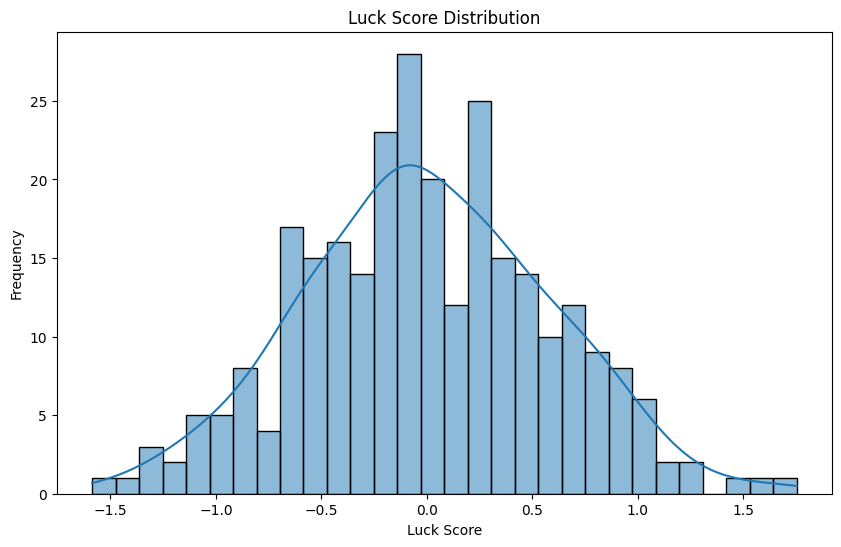

In [22]:
# Weighted combination of all components
luck_df['Luck_Score'] = (
    0.30 * luck_df['component_pdo'] +                    # PDO (team on-ice luck)
    -0.30 * luck_df['component_ipp'] +                   # Involvement luck
    0.20 * luck_df['component_teammate_goals_xgoals'] +  # Linemate/team luck
    0.10 * luck_df['component_goals_xgoals'] +           # Personal finishing luck
    0.10 * luck_df['component_lowdanger']                # Shot quality luck
)

plt.figure(figsize=(10, 6))
sns.histplot(luck_df['Luck_Score'], bins=30, kde=True)
plt.title('Luck Score Distribution')
plt.xlabel('Luck Score')
plt.ylabel('Frequency')
plt.show()


It worked! We have a normal distribution, so our math was correct! Our luckiest charm of the 2024-25 season was... (imagine there's a corny drum roll here) JJ Peterka! JJ Peterka had an incredible breakout season last year, and was a bright spot on an otherwise dissappointing Buffalo Sabres Team. What really set him apart from other players was his huge Teammate Goals minus Expected Goals difference. Last year he became a much better playmaker and nearly doubled his career high assists total.

In [23]:
print("TOP 10 LUCKIEST PLAYERS IN THE NHL (2024 Season, 5v5)")

luck_df.nlargest(10, 'Luck_Score')[
    ['name', 'team', 'position', 'Luck_Score',
     'component_pdo', 'component_goals_xgoals', 'component_teammate_goals_xgoals',
     'component_ipp', 'component_lowdanger']
]


TOP 10 LUCKIEST PLAYERS IN THE NHL (2024 Season, 5v5)


,name,team,position,Luck_Score,component_pdo,component_goals_xgoals,component_teammate_goals_xgoals,component_ipp,component_lowdanger
4472,JJ Peterka,BUF,R,1.754177,1.420772,1.816297,3.126413,-1.083948,1.958489
4537,Kirill Marchenko,CBJ,R,1.612333,2.127610,2.675489,0.771595,-0.837337,3.009810
2392,Brayden Point,TBL,C,1.448174,2.267434,1.661380,1.818725,-0.227574,1.697885
767,Jake Guentzel,TBL,C,1.269989,2.159243,0.371581,1.940786,-0.656979,-0.001933
3032,Alex Iafallo,WPG,L,1.242725,1.565437,-0.675543,0.942813,-2.144604,0.087045
1332,Adrian Kempe,LAK,R,1.180304,2.287114,1.068144,1.344476,0.013880,1.226245
3562,Simon Benoit,TOR,D,1.171758,1.458202,-0.031689,1.286739,-1.793812,-0.580253
2012,Esa Lindell,DAL,D,1.027736,1.994416,-0.065172,1.123149,-0.958009,-0.761040
1837,Jordan Kyrou,STL,R,1.027428,1.973960,2.303428,0.825344,0.664901,2.392991
732,Juraj Slafkovsk,MTL,L,1.011247,1.128212,-0.236128,2.095865,-0.606111,0.953893


In [24]:
print("TOP 10 UNLUCKIEST PLAYERS IN THE NHL (2024 Season, 5v5)")
luck_df.nsmallest(10, 'Luck_Score')[
    ['name', 'team', 'position', 'Luck_Score', 
     'component_pdo', 'component_goals_xgoals', 'component_teammate_goals_xgoals',
     'component_ipp', 'component_lowdanger']
]



TOP 10 UNLUCKIEST PLAYERS IN THE NHL (2024 Season, 5v5)


,name,team,position,Luck_Score,component_pdo,component_goals_xgoals,component_teammate_goals_xgoals,component_ipp,component_lowdanger
2127,Sam Steel,DAL,C,-1.586776,-1.407685,-0.760224,-1.563049,2.491995,-0.282397
4182,Alexander Kerfoot,UTA,C,-1.440901,-1.245025,-1.094082,-2.189002,1.375540,-1.075225
3037,Logan O'Connor,COL,R,-1.285091,-1.548609,-0.065648,-1.725069,1.481691,-0.244229
2872,Conor Garland,VAN,R,-1.283190,-0.867702,-0.628837,-1.329323,1.588155,-2.176852
1347,Travis Konecny,PHI,R,-1.263194,-1.176164,-0.623230,-0.644318,2.309489,-0.263113
147,Scott Laughton,TOR,C,-1.189860,-1.792731,-0.638392,-0.312881,1.525832,-0.678760
2262,Brady Skjei,NSH,D,-1.152939,-1.660189,0.246818,-1.934162,0.713596,-0.786523
3802,Paul Cotter,NJD,C,-1.123779,-2.194399,1.312482,-2.047127,1.108355,1.452247
577,Jake Sanderson,OTT,D,-1.080926,-1.443615,0.224575,-1.889680,0.781548,-0.578983
1432,Brandon Tanev,WPG,L,-1.071214,-1.302198,-0.779887,-1.255948,0.608273,-1.688938


We can get a better idea of how much more luck JJ Peterka brings to his team, if we plot all of the components, and where JJ Peterka lies along the historgram.

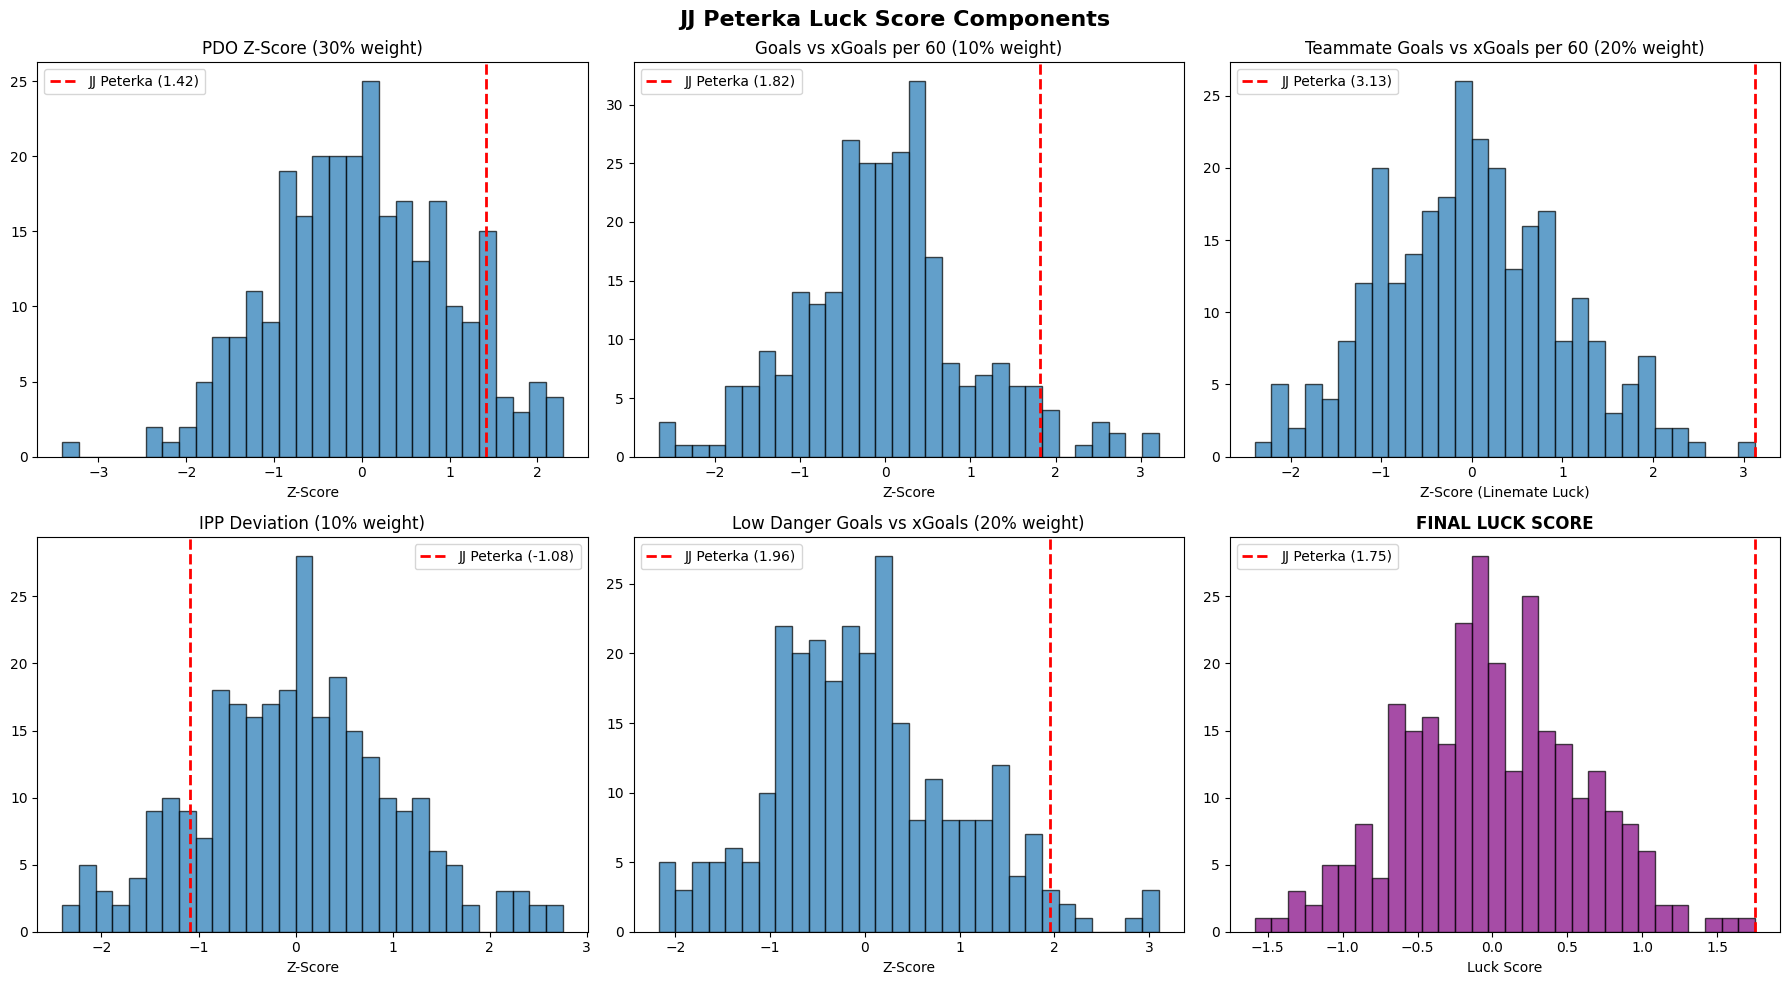

In [25]:
jj_peterka = luck_df[luck_df['name'] == 'JJ Peterka']

jj_peterka

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('JJ Peterka Luck Score Components', fontsize=16, fontweight='bold')

# Component 1: PDO
axes[0, 0].hist(luck_df['component_pdo'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('PDO Z-Score (30% weight)')
axes[0, 0].set_xlabel('Z-Score')
pdo_value = jj_peterka['component_pdo'].values[0]
axes[0, 0].axvline(pdo_value, color='red', linestyle='--', linewidth=2, label=f'JJ Peterka ({pdo_value:.2f})')
axes[0, 0].legend()

# Component 2: Goals vs xGoals
axes[0, 1].hist(luck_df['component_goals_xgoals'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Goals vs xGoals per 60 (10% weight)')
axes[0, 1].set_xlabel('Z-Score')
goals_xgoals_value = jj_peterka['component_goals_xgoals'].values[0]
axes[0, 1].axvline(goals_xgoals_value, color='red', linestyle='--', linewidth=2, label=f'JJ Peterka ({goals_xgoals_value:.2f})')
axes[0, 1].legend()

# Component 3: Teammate Goals vs xGoals (linemate luck)
axes[0, 2].hist(luck_df['component_teammate_goals_xgoals'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 2].set_title('Teammate Goals vs xGoals per 60 (20% weight)')
axes[0, 2].set_xlabel('Z-Score (Linemate Luck)')
onice_goals_xgoals_value = jj_peterka['component_teammate_goals_xgoals'].values[0]
axes[0, 2].axvline(onice_goals_xgoals_value, color='red', linestyle='--', linewidth=2, label=f'JJ Peterka ({onice_goals_xgoals_value:.2f})')
axes[0, 2].legend()

# Component 4: IPP
axes[1, 0].hist(luck_df['component_ipp'], bins=30, edgecolor='black', alpha=0.7)
axes[1, 0].set_title('IPP Deviation (10% weight)')
axes[1, 0].set_xlabel('Z-Score')
ipp_value = jj_peterka['component_ipp'].values[0]
axes[1, 0].axvline(ipp_value, color='red', linestyle='--', linewidth=2, label=f'JJ Peterka ({ipp_value:.2f})')
axes[1, 0].legend()

# Component 5: Low Danger
axes[1, 1].hist(luck_df['component_lowdanger'], bins=30, edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Low Danger Goals vs xGoals (20% weight)')
axes[1, 1].set_xlabel('Z-Score')
lowdanger_value = jj_peterka['component_lowdanger'].values[0]
axes[1, 1].axvline(lowdanger_value, color='red', linestyle='--', linewidth=2, label=f'JJ Peterka ({lowdanger_value:.2f})')
axes[1, 1].legend()

# Final Luck Score
axes[1, 2].hist(luck_df['Luck_Score'], bins=30, edgecolor='black', alpha=0.7, color='purple')
axes[1, 2].set_title('FINAL LUCK SCORE', fontweight='bold')
axes[1, 2].set_xlabel('Luck Score')
luck_score_value = jj_peterka['Luck_Score'].values[0]
axes[1, 2].axvline(luck_score_value, color='red', linestyle='--', linewidth=2, label=f'JJ Peterka ({luck_score_value:.2f})')
axes[1, 2].legend()

plt.tight_layout()
plt.show()


## Interpreting Luck

Ok so here's where we get a little hand wavy, but stick with me! Let's try to make something fun out of this score. I want to know how many goals does 1 luck translate into for a team. 

What we're going to do is:

(On Ice Goals - On Ice xG) / luck

for each player, and then get the average of the On Ice Goals above expected per luck per player, we can see how many goals 1 luck is worth over a season.

In [26]:
# calculate how many goals each team scored with the player on the ice
onice_f_g = luck_df['OnIce_F_goals']
onice_f_xg = luck_df['OnIce_F_xGoals']

luck_score = luck_df['Luck_Score']

goals_minus_xgoals = onice_f_g - onice_f_xg

# divide goals above expected by luck score to get a sense of how many goals per luck score
goals_per_luck_score = goals_minus_xgoals / luck_score

goals_per_luck_score_mean = np.mean(goals_per_luck_score)

print(f"Goals per Luck Score: {goals_per_luck_score_mean:.3f}")

Goals per Luck Score: 8.876


So, JJ Peterka is good for 15.57 lucky goals from his team when he is on the ice, over the course of a whole season. If we agree that scoring 5 goals (waving our hand so often we have jazz hands), then JJ Peterka is good for 3 lucky wins on the season.

In [27]:
luck_df['lucky_goals'] = luck_df['Luck_Score'] * goals_per_luck_score_mean

luck_df[
    ['name', 'team', 'position', 
     'OnIce_PDO_100', 'I_F_goals', 'I_F_xGoals', 
     'IPP_percentage', 'Luck_Score', 'lucky_goals']
     ].sort_values(by='lucky_goals', ascending=False).head(10)

,name,team,position,OnIce_PDO_100,I_F_goals,I_F_xGoals,IPP_percentage,Luck_Score,lucky_goals
4472,JJ Peterka,BUF,R,103.219283,18.0,11.20,59.154930,1.754177,15.570500
4537,Kirill Marchenko,CBJ,R,104.717091,24.0,12.78,61.333333,1.612333,14.311460
2392,Brayden Point,TBL,C,105.013382,21.0,14.34,61.111111,1.448174,12.854343
767,Jake Guentzel,TBL,C,104.784122,19.0,17.64,56.944444,1.269989,11.272727
3032,Alex Iafallo,WPG,L,103.525832,8.0,10.15,50.000000,1.242725,11.030730
1332,Adrian Kempe,LAK,R,105.055084,21.0,16.92,68.852459,1.180304,10.476666
3562,Simon Benoit,TOR,D,103.298599,1.0,1.37,20.454545,1.171758,10.400804
2012,Esa Lindell,DAL,D,104.434848,3.0,3.64,27.272727,1.027736,9.122433
1837,Jordan Kyrou,STL,R,104.391503,25.0,15.57,74.603175,1.027428,9.119703
732,Juraj Slafkovsk,MTL,L,102.599342,13.0,14.16,62.295082,1.011247,8.976070


## Just Luck?

So is JJ Peterka not good, is he just lucky? **NO!!!** JJ Peterka is not good because he's lucky, he's lucky because he is good. And besides, we weren't measuring how lucky JJ Peterka is, but how lucky he is making his team! That's a very important distinction to understand. 

We even see that the highest value component for him, was how many goals his teammates scored. While he had a lower IPP than average, it's not significantly lower, just 1 std. He also became a much better playmaker in the 2024-25 season than he ever was before, which is shown in in his assists nearly doubling from 22 to 41. The low IPP can be explained by dry stretches that every young player goes through. Even still, he has improved his consistency tremendously which is what led to his career best points and assists. 

This season so far, he's already put up 7 points in his first 8 games. He's now part of a new team, new franchise, and one that just got a new logo and is in a market that's hungry for hockey. We've seen what Vegas accomplished in their first few seasons compared to Seattle. Well, one of those cities is world famous for their luck. Maybe it's not such a bad idea to take a bet on bringing in a lucky charm for a few clutch goals.

Thanks for reading!

# Thanks For Reading!

Hey everyone, thanks for reading (I know I said it 3 times in a row, sorry)! I wanted to add in this little note here since it's my first article ever on Medium. I want to try to write some fun articles on some cool anomalies, or making silly stats like this one. Hockey stats lag significantly far behind other sports like baseball and basketball, and I'd love to try to add to the community and try to make them more accessible. I'm not one who believes stats are the end all - be all, and capture everything, but they can bring interesting insights and can help inform a lot about the game. 

I've also started a YouTube channel, which I hope to be more digestible, and these blogs will be more in depth. [This is the link to this topic's video.](https://www.youtube.com/watch?v=SrwnINF2jcs)

Let me know if you enjoyed, and what your thoughts were on this!